# Mean Square Error

### Instructions:
-  Replace the placeholders (between <font color="green">`## TODO ##`</font> and <font color="green">`## TODO ##`</font>) with the appropriate details.

*In this exercise, you will investigate the applications of Mean Squared Error (MSE).*

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import mean_squared_error

# Linear Regression

Linear regression is a fundamental statistical method used to model the relationship between a dependent variable and one or more independent variables. The goal is to find the best-fitting line through the data points.

The linear regression model can be expressed as:

$$ y = f(x) = a x + b$$

Where:
- $ y $ is the dependent variable.
- $ x $ is the independent variable.
- $ b $ is the y-intercept.
- $ a $ is the slope of the line.

We utilize the Mean Squared Error (MSE) approach to determine the coefficients $a$ and $b$ based on a set of sample data. 
$$ MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - f(x_i))^2 $$

Where:
- $ n $ is the number of observations.
- $(x_i, y_i)$ is a given sample data 

## Finding the Solution

To find the solution for the coefficients $ b $ and $ a $, we can use calculus. The steps are as follows:

1. **Set up the error function**:
   $$ MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - (a x_i + b))^2 $$

2. **Derive the  solution** for $ b $ and $ a $ by taking the partial derivatives of the error function $ MSE $ and setting them to zero. Then solve the equations to find $ b $ and $ a $.


   1. Partial Derivative with respect to 𝑎:
   
      $$ \frac{\partial}{\partial a} MSE_{\text{regression}} = \frac{\partial}{\partial a} \left( \frac{1}{n} \sum_{i=1}^{n} (Y_i - (aX_i+b))^2 \right) $$

   2. Partial Derivative with respect to 𝑏:

      $$ \frac{\partial}{\partial b} MSE_{\text{regression}} = \frac{\partial}{\partial b} \left( \frac{1}{n} \sum_{i=1}^{n} (Y_i - (aX_i + b))^2 \right) $$

   * Solving for **𝑏**:

      $$ \frac{2}{n} \sum_{i=1}^{n} -(Y_i - aX_i - b) = 0 $$
      $$ \sum_{i=1}^{n} Y_i - a \sum_{i=1}^{n} X_i - b \sum_{i=1}^{n} 1 = 0 $$
      $$ n\bar{Y} - a n\bar{X} - nb = 0 $$
      $$ b = \bar{Y} - a\bar{X} $$

   * Solving for **a**:

$$ \frac{2}{n} \sum_{i=1}^{n} -X_i (Y_i - aX_i - b) = 0 $$
$$ \sum_{i=1}^{n} X_i Y_i - a \sum_{i=1}^{n} X_i^2 - b \sum_{i=1}^{n} X_i = 0 $$
$$  a \sum_{i=1}^{n} X_i^2 + b \sum_{i=1}^{n} X_i = \sum_{i=1}^{n} X_i Y_i  $$

Substituting 𝑏 back into the equation for 𝑎:

$$ a \sum_{i=1}^{n} X_i^2 + (\bar{Y} - a\bar{X}) \sum_{i=1}^{n} X_i = \sum_{i=1}^{n} X_i Y_i $$
$$ a \sum_{i=1}^{n} X_i^2 + \bar{Y} \sum_{i=1}^{n} X_i - a\bar{X} \sum_{i=1}^{n} X_i = \sum_{i=1}^{n} X_i Y_i $$
$$ a \left( \sum_{i=1}^{n} X_i^2 - \bar{X} \sum_{i=1}^{n} X_i \right) = \sum_{i=1}^{n} X_i Y_i - \bar{Y} \sum_{i=1}^{n} X_i $$
$$ a \left( \sum_{i=1}^{n} X_i^2 - n\bar{X}^2 \right) = \sum_{i=1}^{n} X_i Y_i - n\bar{X}\bar{Y} $$

> Finally:

$$ a = \frac{\sum_{i=1}^{n} X_i Y_i - n\bar{X}\bar{Y}}{\sum_{i=1}^{n} X_i^2 - n\bar{X}^2} $$
$$ b = \bar{Y} - a\bar{X} $$

In another form (for better visualization):

$$ a = \frac{\sum{(X_i - \bar{X})(Y_i - \bar{Y})}}{\sum{(X_i - \bar{X})^2}} $$
$$ b = \bar{Y} - a\bar{X} $$

In [3]:
class SimpleLinearRegression:
    """
    A class to represent a simple linear regression model.

    Attributes:
        slope (float): The slope of the regression line.
        intercept (float): The intercept of the regression line.
    """
    def __init__(self):
        self.slope: float = 0  # Slope of the regression line
        self.intercept: float = 0  # Intercept of the regression line

    def fit(self, x: list[float], y: list[float]) -> None:
        """
        Fit the linear regression model to the data.

        Args:
            x (list[float]): List of independent variable values.
            y (list[float]): List of dependent variable values.
        """
        ######################  TODO  ########################
        
        n = len(x)
        mean_x = np.mean(x)
        mean_y = np.mean(y)

        numerator = 0
        denominator = 0

        for i in range(len(x)):
            numerator += (x[i] - mean_x) * (y[i] - mean_y)
            denominator += (x[i] - mean_x) ** 2

        self.slope = numerator / denominator
        self.intercept = mean_y - self.slope * mean_x

        ######################  TODO  ########################


    def predict(self, x: list[float]) -> list[float]:
        """
        Predict the dependent variable values for given independent variable values.

        Args:
            x (list[float]): List of independent variable values to predict.
        
        """
        ######################  TODO  ########################
        
        return self.slope * x + self.intercept

        ######################  TODO  ########################


## Training the Model

In [4]:
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

######################  TODO  ########################

model = SimpleLinearRegression()
model.fit(diabetes_X_train, diabetes_y_train)
predicted_y_diabetes = model.predict(diabetes_X_test)

mse = mean_squared_error(diabetes_y_test, predicted_y_diabetes) 
print("Mean Squared Error:", mse)

######################  TODO  ########################



Mean Squared Error: 2548.0723987259694


## Plotting the Regression Line and Data Points

Once you have implemented the `SimpleLinearRegression` class and trained your model, it is important to visualize the results. This will help you understand how well your regression line fits the original data points.

### Objectives:
1. Plot the original data points (x, y).
2. Plot the regression line using the slope and intercept obtained from your model.

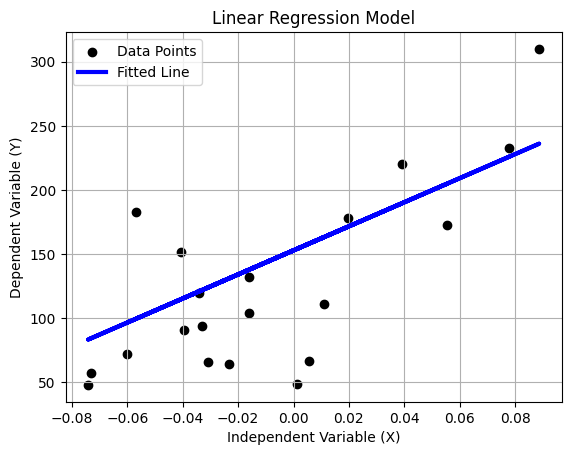

In [5]:
plt.scatter(diabetes_X_test, diabetes_y_test, color="black", label="Data Points")

plt.plot(diabetes_X_test, predicted_y_diabetes, color="blue", linewidth=3, label="Fitted Line")
plt.xlabel("Independent Variable (X)")
plt.ylabel("Dependent Variable (Y)")
plt.title("Linear Regression Model")
plt.legend()
plt.grid()
plt.show()



Now you will explore the solution for linear regression when x is a vector. We will first prove the solution mathematically and then implement it in Python.

## Prove the Solution

### Linear Regression Model

$$
y = f(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \ldots + \theta_n x_n
$$

Where:
- $ \theta $ is the vector of parameters (weights),
- $ x $ is the feature vector.

We utilize the Mean Squared Error (MSE) approach to determine the coefficient $\theta$ based on a set of sample data. 

$$
MSE = \frac{1}{m} \sum_{i=1}^{m} (y_i - f(x))^2
$$

Where:
- $ m $ is the number of samples,
- $(x_i, y_i)$ is a given sample data.

### Matrix Notation

In matrix form, the cost function can be expressed as:

$$
MSE = \frac{1}{m} (y - x\theta)^T (y - x\theta)
$$

### Finding the Solution

To minimize the cost function, take the derivative with respect to $ \theta $ and set it to zero:

$$
\frac{\partial MSE}{\partial \theta} = -\frac{2}{m} x^T (y - x\theta) = 0
$$

Rearranging gives:

$$
x^T y = x^T x \theta
$$

Finally, solving for $ \theta $ yields the solution:

$$
\theta = (x^T x)^{-1} x^T y
$$

## Implement the Solution

Now that we have proven the solution, implement it in Python.

**Note:**  Make sure to use NumPy for matrix operations.

In [6]:
class LinearRegression:
    def __init__(self) -> None:
        """Initializes the Linear Regression model."""
        self.theta: np.ndarray = None  # Parameters (weights) will be initialized in fit()

    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        """
        Fits the linear regression model to the training data.

        Args:
            X (np.ndarray): Feature matrix of shape (m, n) where m is the number of samples
                            and n is the number of features.
            y (np.ndarray): Target vector of shape (m, 1) where m is the number of samples.
        """
        ######################  TODO  ########################

        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        
        X_b_T_X_b = X_b.T.dot(X_b)
        X_b_T_y = X_b.T.dot(y)      
        self.theta = np.linalg.inv(X_b_T_X_b).dot(X_b_T_y) 

        ######################  TODO  ########################

    def predict(self, X: np.ndarray) -> np.ndarray:
        """
        Makes predictions using the learned parameters.

        Args:
            X (np.ndarray): Feature matrix of shape (m, n) where m is the number of samples
                            and n is the number of features.

        Returns:
            np.ndarray: Predicted values of shape (m, 1).
        """
        ######################  TODO  ########################
        
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        return X_b.dot(self.theta)

        ######################  TODO  ########################

Next, train the model using the previous dataset while considering three features. Once the training is complete, calculate the Mean Squared Error (MSE) and display the result.

In [11]:
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only three features
diabetes_X = diabetes_X[:, 0:3]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

######################  TODO  ########################

model = LinearRegression()
model.fit(diabetes_X_train, diabetes_y_train)
predicted_y = model.predict(diabetes_X_test)

mse = mean_squared_error(diabetes_y_test, predicted_y)
print("Mean Squared Error (MSE):", mse)

######################  TODO  ########################

Mean Squared Error (MSE): 2585.663764713474


# Finding the Center of a Dataset by Minimizing Mean Squared Error (MSE)

In this part, you will implement a method to find the center of a dataset that minimizes the Mean Squared Error (MSE) between each data point and the center. The center can be thought of as the value that best represents the dataset in terms of minimizing the average squared difference from the data points.

**TODO:**
1. Formulate the error function.
2. Identify the optimal coordinates $x$ and $y$ for the center by applying derivative method.
3. Calculate the center for the training data from the previous sections (consider only one feature).
4. Plot the data points along with obtained center.


## Problem:
Given a set of points (X_1, Y_1), (X_2, Y_2), ..., (X_n, Y_n), we want to find the center point c = (c_x, c_y) that minimizes the Mean Squared Error (MSE).

The MSE for the center point is defined as:


$$ MSE_{\text{center}} = \frac{1}{n} \sum_{i=1}^{n} \left( (X_i - c_x)^2 + (Y_i - c_y)^2 \right) $$

Partial derivative with respect to \(c_x\):

$$ 
\frac{\partial}{\partial c_x} MSE_{\text{center}} = \frac{\partial}{\partial c_x} \left( \frac{1}{n} \sum_{i=1}^{n} (X_i - c_x)^2 \right) 
$$

$$ 
\frac{\partial}{\partial c_x} MSE_{\text{center}} = -\frac{2}{n} \sum_{i=1}^{n} (X_i - c_x) 
$$

$$ 
-\frac{2}{n} \sum_{i=1}^{n} (X_i - c_x) = 0 
$$

$$ 
\sum_{i=1}^{n} (X_i - c_x) = 0 
$$

$$ 
\sum_{i=1}^{n} X_i = n c_x 
$$

$$ 
c_x = \frac{1}{n} \sum_{i=1}^{n} X_i 
$$

Partial derivative with respect to \(c_y\):

$$ 
\frac{\partial}{\partial c_y} MSE_{\text{center}} = \frac{\partial}{\partial c_y} \left( \frac{1}{n} \sum_{i=1}^{n} (Y_i - c_y)^2 \right) 
$$

$$ 
\frac{\partial}{\partial c_y} MSE_{\text{center}} = -\frac{2}{n} \sum_{i=1}^{n} (Y_i - c_y) 
$$

$$ 
-\frac{2}{n} \sum_{i=1}^{n} (Y_i - c_y) = 0 
$$

$$ 
\sum_{i=1}^{n} (Y_i - c_y) = 0 
$$

$$ 
\sum_{i=1}^{n} Y_i = n c_y 
$$

$$ 
c_y = \frac{1}{n} \sum_{i=1}^{n} Y_i 
$$

> ### Center Point:
$$ c = \left( \frac{1}{n} \sum_{i=1}^{n} X_i, \frac{1}{n} \sum_{i=1}^{n} Y_i \right) $$

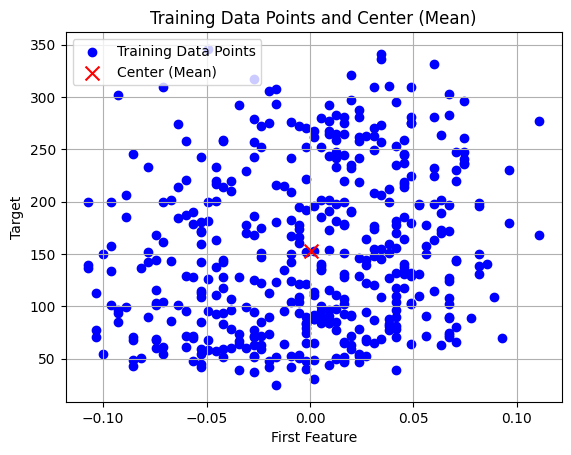

Center (Mean) of the first feature in the training dataset: (0.00039047198185187594, 153.36255924170615)


In [12]:
######################  TODO  ########################

center_x = np.mean(diabetes_X_train[:, 0])
center_y = np.mean(diabetes_y_train)

plt.scatter(diabetes_X[:, 0], diabetes_y, color='blue', label='Training Data Points')
plt.scatter(center_x, center_y, color='red', label='Center (Mean)', marker='x', s=100, zorder=10)

plt.xlabel('First Feature')
plt.ylabel('Target')
plt.title('Training Data Points and Center (Mean)')
plt.legend()
plt.grid()
plt.show()

print(f"Center (Mean) of the first feature in the training dataset: ({center_x}, {center_y})")

######################  TODO  ########################